# Diabetes Health Indicators Analysis


- This project analyzes the Diabetes Health Indicators Dataset (BRFSS 2015) to understand how lifestyle, health conditions, and demographic factors relate to diabetes prevalence.
- The main objective was to identify patterns and risk factors associated with diabetes using exploratory data analysis, statistical summaries, and visualization techniques.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### We import required Python libraries for data analysis:
- pandas → data loading and manipulation
- numpy → numerical operations
- matplotlib → basic plotting
- seaborn → advanced statistical visualization
- These libraries form the core toolkit for exploratory data analysis.

In [2]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


###The dataset is loaded using pandas.
- read_csv(): Reads the CSV file into a DataFrame.
- head(): Displays the first five rows to understand dataset structure and columns.

In [4]:
df.shape # (rows, columns)

(253680, 22)

In [5]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### Displays all feature names available in the dataset.
**- Helps identify:**
- health indicators
- lifestyle variables
- target variable (Diabetes)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### Provides:
- data types
- non-null counts
- memory usage
- Used to check if cleaning is required.

In [7]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Generates descriptive statistics:
- mean
- minimum
- maximum
- standard deviation
- Helps understand overall data distribution.

In [8]:
df.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


- Counts missing values in each column.
- Important because missing data can bias analysis.
- Result showed **no missing values**.

In [9]:
df.duplicated().sum()

np.int64(24206)

- Identifies repeated records.
- Duplicates can distort statistical results.

In [10]:
df = df.drop_duplicates() # Removes duplicate observations to ensure reliable analysis.

In [11]:
df.rename(columns={"Diabetes_binary": "Diabetes"}, inplace=True)

- Renames column for better readability.
- Cleaner naming improves analysis clarity.

## Diabetes Distribution

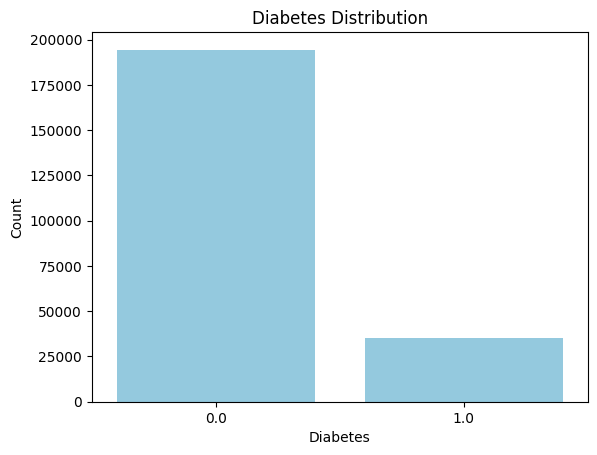

In [15]:
sns.countplot(x="Diabetes", data=df, color="skyblue")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.title("Diabetes Distribution")
plt.show()

#### Visualizes number of diabetic vs non-diabetic individuals.
- Used to check class imbalance.
#####Observation:
- Most individuals do not have diabetes.

## BMI vs Diabetes

/tmp/ipython-input-3418311448.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diabetes", y="BMI", data=df, palette='Set2')


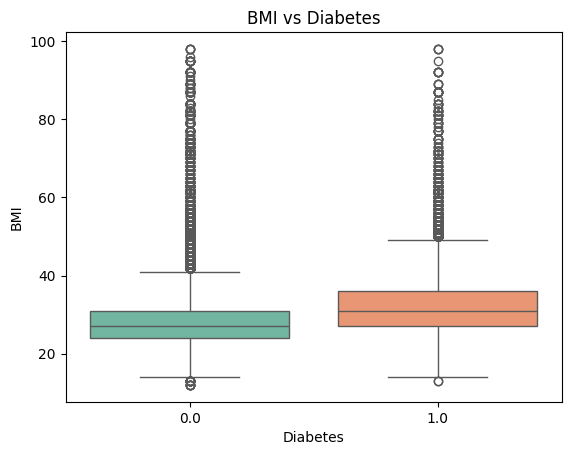

In [18]:
sns.boxplot(x="Diabetes", y="BMI", data=df, palette='Set2')
plt.title("BMI vs Diabetes")
plt.show()

### Compares BMI distribution between groups.
#### Boxplot shows:
- median
- spread
- outliers
#### Insight:
- Diabetic individuals tend to have higher BMI.

## Physical Activity Analysis

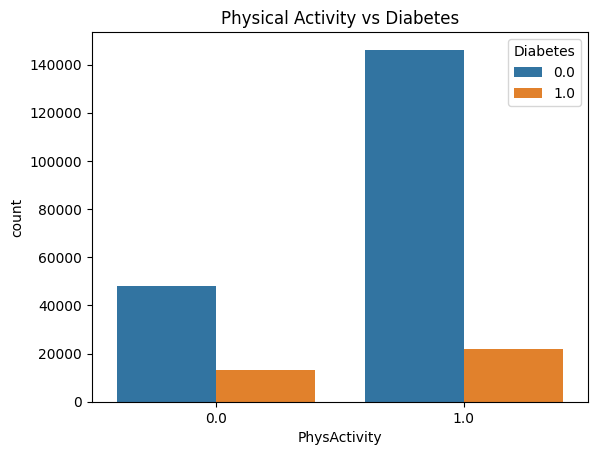

In [19]:
sns.countplot(x="PhysActivity", hue="Diabetes", data=df)
plt.title("Physical Activity vs Diabetes")
plt.show()

### Explanation:
- Compares diabetes occurrence between active and inactive individuals.
#### Insight:
- Physically active individuals show lower diabetes prevalence.

## GroupBy Analysis with Age

In [20]:
df.groupby("Age")["Diabetes"].mean() # Groups people by age category and calculates diabetes rate. Diabetes increases with age.

,Diabetes
Age,
1.0,0.014154
2.0,0.019819
3.0,0.031328
4.0,0.051108
5.0,0.074715
6.0,0.100752
7.0,0.132866
8.0,0.155507
9.0,0.191421


## GroupBy with Lifestyle Factors

In [21]:
df.groupby("PhysActivity")["Diabetes"].mean()

,Diabetes
PhysActivity,
0.0,0.212831
1.0,0.131137


### Explanation

#### GroupBy operations helped summarize health patterns:
- Older individuals have higher diabetes rates.
- Smokers show slightly increased diabetes prevalence.
- Physically active individuals demonstrate lower diabetes occurrence.
- Poor general health correlates with higher diabetes likelihood.
- Compares diabetes rate between active and inactive groups.
- Used to evaluate lifestyle impact.

## Pivot Table Analysis

In [22]:
pd.pivot_table(
    df,
    values="Diabetes",
    index="Age",
    columns="PhysActivity",
    aggfunc="mean"
)

PhysActivity,0.0,1.0
Age,,
1.0,0.020053,0.013227
2.0,0.033079,0.017162
3.0,0.045054,0.028052
4.0,0.066349,0.046732
5.0,0.101735,0.066274
6.0,0.140618,0.087125
7.0,0.183114,0.113993
8.0,0.208432,0.134919
9.0,0.249245,0.169058


#### Explanation

####Key findings:
- Older age groups combined with poor health status exhibit the highest diabetes prevalence.
- Physical activity reduces diabetes risk across nearly all age categories.
-Health condition and lifestyle together influence diabetes more than a single factor.

##### Creates a two-dimensional summary:
- Rows: Age groups (age code: 1.0-13.0)
- Columns: Physical activity
- Values: Diabetes rate
- Pivot tables allow multi-variable comparison simultaneously.

## Correlation Heatmap

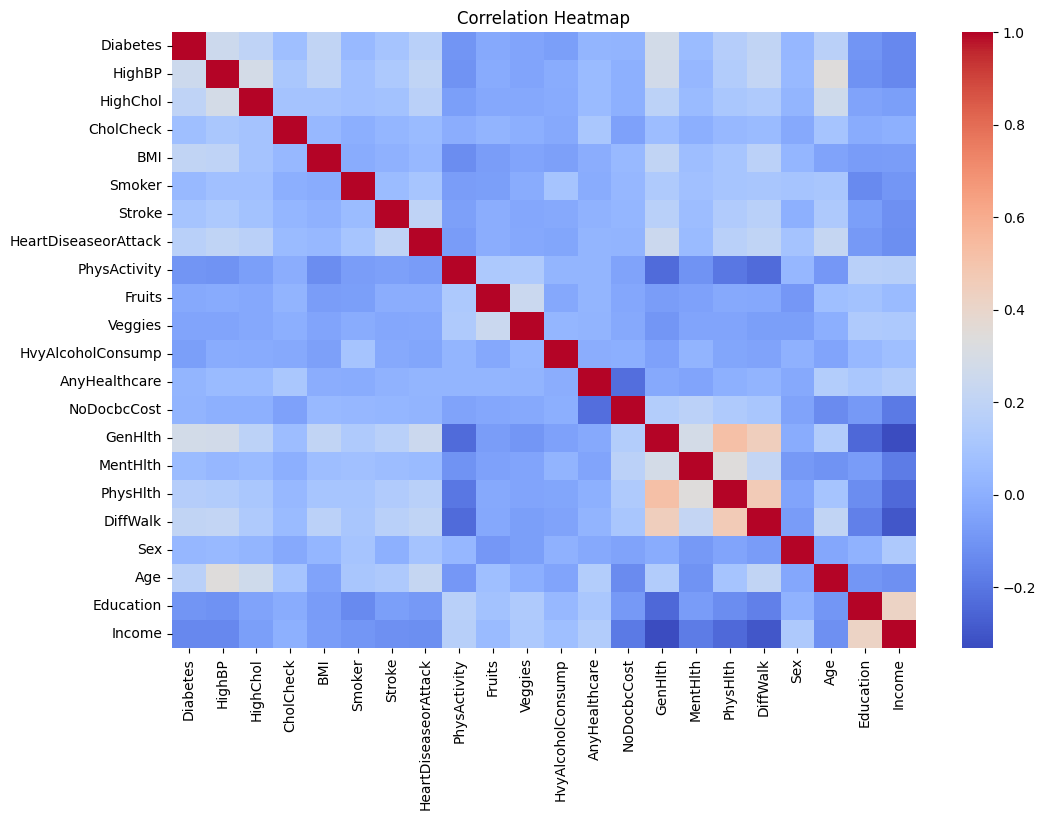

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### Diabetes is influenced by a combination of lifestyle and medical conditions rather than a single factor.
- -1:  negative relation (Blue Color))
- 0: no relation (White Color)
- +1: strong relation (Darker Red color = stronger relationship.)

- The correlation heatmap was used to identify relationships between health indicators and diabetes occurrence.
###### Key observations include:
- BMI shows a positive correlation with diabetes, indicating higher body weight is associated with increased diabetes prevalence.
- Age demonstrates a positive relationship with diabetes, suggesting risk increases among older individuals.
- High blood pressure and heart disease indicators also show notable correlations with diabetes.
- Lifestyle factors such as physical activity display weaker or negative relationships, suggesting potential protective effects.
- Overall, diabetes appears influenced by multiple interconnected health conditions rather than a single factor.

### Key Healthcare Insights:
####From the analysis:
- Higher BMI significantly increases diabetes risk.
- Aging populations require stronger preventive healthcare strategies.
- Physical activity acts as a protective factor.
- Poor overall health strongly correlates with diabetes occurrence.
- Preventive lifestyle interventions may reduce diabetes prevalence.

## Final Conclusion
#### This analysis demonstrates that diabetes is a multifactorial health condition influenced by age, lifestyle habits, and overall health status.
##### The findings highlight the importance of:
- Maintaining healthy body weight
- Encouraging regular physical activity
- Monitoring cardiovascular health
- Implementing early preventive healthcare programs
- Data-driven insights such as these can assist healthcare professionals and policymakers in developing effective diabetes prevention strategies.